In [1]:
import cv2, os, sys

In [31]:
DPATH = '/home/ubuntu/datasets/tissue'
imfiles = [fl for fl in os.listdir('%s/cancers' % DPATH) if '.jpg' in fl]
len(imfiles)

imfiles = [fl for fl in imfiles if '02420_RIGHT_MLO_0' in fl]
print(len(imfiles))

100


In [32]:
from random import randint
import matplotlib.pyplot as plt

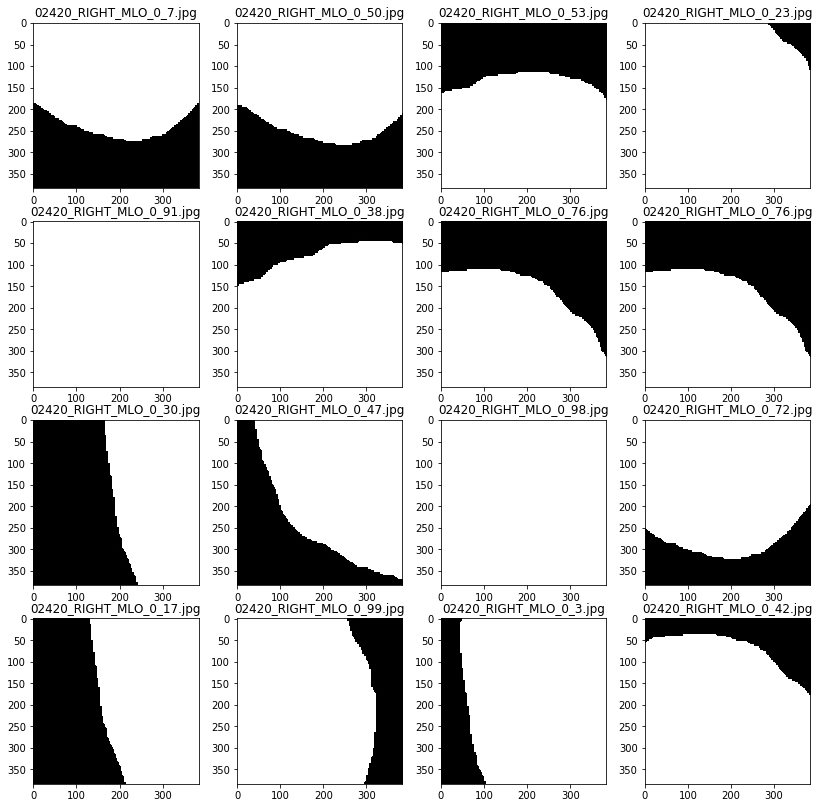

In [33]:
plt.figure(figsize=(14, 14))

for ii in range(min(16, len(imfiles))):
    plt.subplot(4, 4, ii+1)
    ind = randint(0, len(imfiles)-1)
    impath = '%s/cancers/%s' % (DPATH, imfiles[ind])
#     print(impath)
    plt.gca().set_title(imfiles[ind])
    img = cv2.imread(impath, 1)
#     print(img.dtype)
    plt.imshow(img)
plt.show()
plt.close()

In [34]:
import pydicom

In [40]:
impath = '/home/ubuntu/datasets/chest/CBIS-DDSM/Mass-Training_P_00694_RIGHT_MLO/07-20-2016-DDSM-05\
056/1-full mammogram images-73126/000000.dcm'
maskpath = '/home/ubuntu/datasets/chest/CBIS-DDSM/Mass-Training_P_00694_RIGHT_MLO_1/07-21-2016-DDSM\
-79580/1-ROI mask images-29379/000000.dcm'

In [43]:
with pydicom.dcmread(impath) as db:
    img = db.pixel_array
with pydicom.dcmread(maskpath) as db:
    mask = db.pixel_array

In [44]:
import matplotlib.pyplot as plt

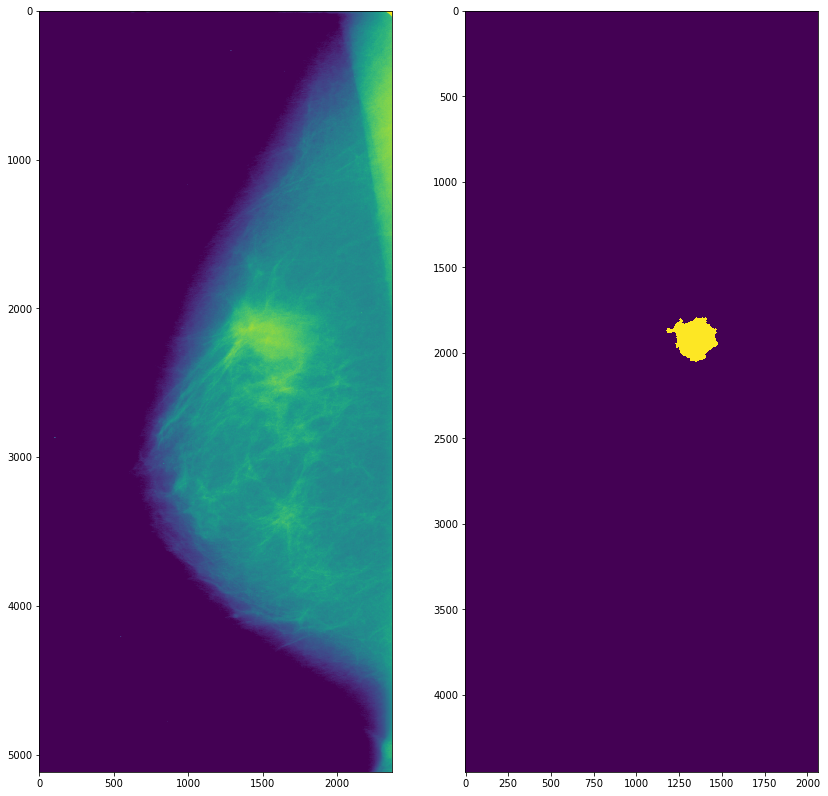

In [45]:
plt.figure(figsize=(14, 14))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(mask)
plt.show()
plt.close()

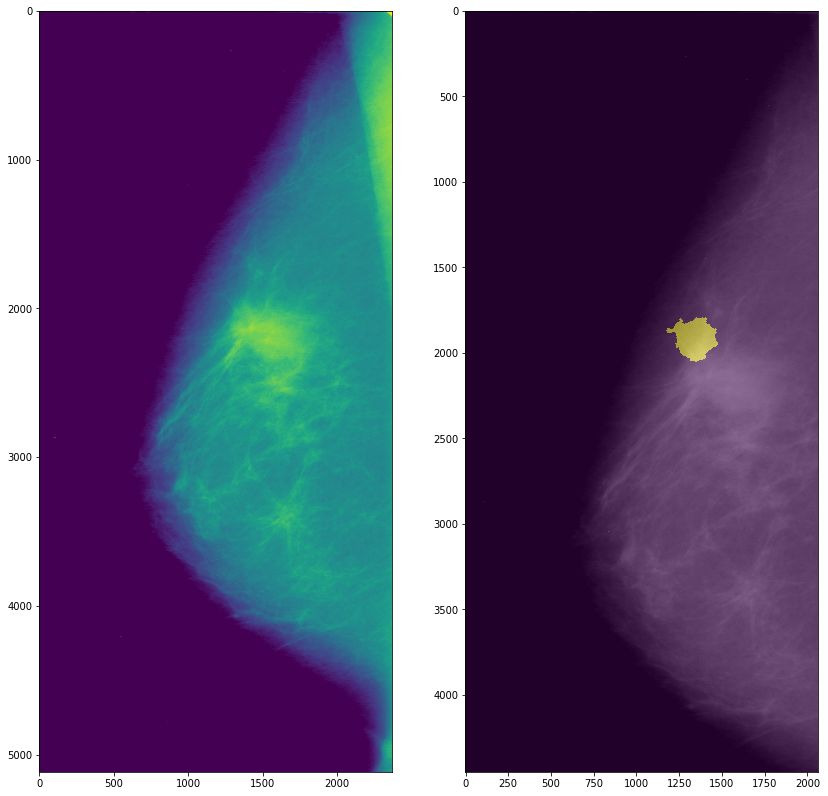

In [46]:
plt.figure(figsize=(14, 14))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(img, cmap='gray')
plt.imshow(mask, alpha=0.5)
plt.show()
plt.close()

In [48]:
print(img.shape[0] / img.shape[1] * mask.shape[1])
print(mask.shape[0])

4451.416280050612
4451


In [49]:
ratio = img.shape[0] / mask.shape[0]

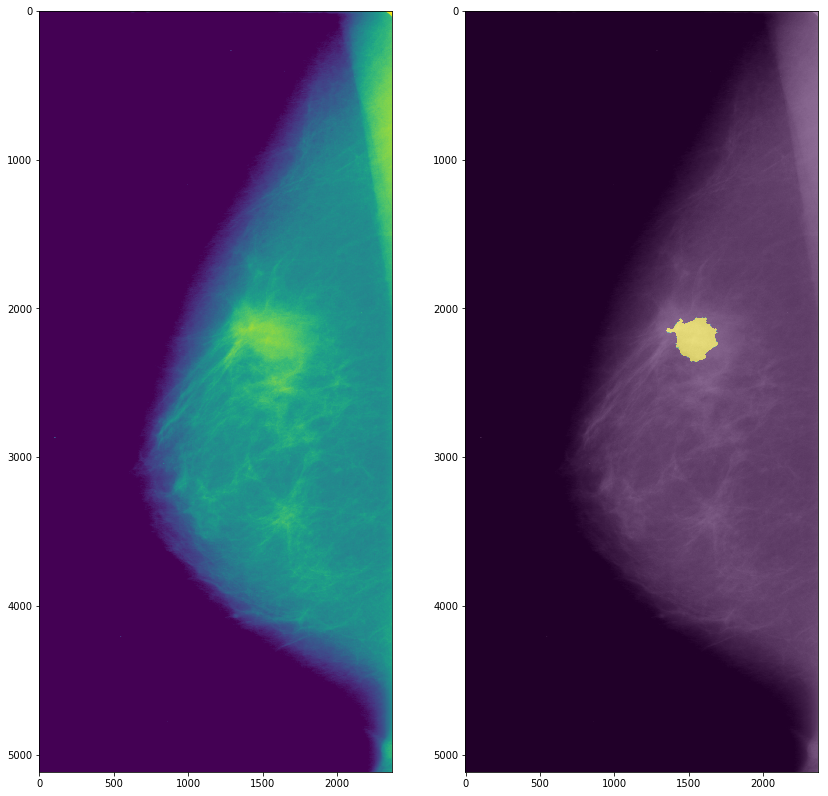

In [50]:
import cv2

plt.figure(figsize=(14, 14))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(img, cmap='gray')
plt.imshow(cv2.resize(mask, (0,0), fx=ratio, fy=ratio), alpha=0.5)
plt.show()
plt.close()